# Part II - Factors Used to Determine Loan Grants
## by  TANWIE RANDY FUNWIE

## Investigation Overview


In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower Rate. The main focus was on the Employment Status,Loan Status,IsBorrowerHomeowner and Stated Monthly Income.

## Dataset Overview
The dataset consisted of borrower Interest and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv), with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading dataset
loan_data =  pd.read_csv('prosperLoanData.csv')

In [3]:
# Changing DataTypes
cat_dict = {'LoanStatus' : [ 'Current','Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)','Cancelled','Chargedoff','Defaulted'],
                    'EmploymentStatus' : ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
                    'ListingCategory (numeric)' : ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],
                    'IncomeRange' : ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$0','$1-24,999','Not employed','Not displayed']}

for var in cat_dict:
    cat_ordered = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = cat_dict[var])
    loan_data[var] = loan_data[var].astype(cat_ordered)

In [4]:
# Changing datatypes
convert_dict = {'BorrowerState' : str, 'Occupation' : str,'IsBorrowerHomeowner': bool, 'CurrentlyInGroup' : bool}

loan_data = loan_data.astype(convert_dict)

## Distribution of Loan Status 
The Employment Status of borrowers across shows that most of the borrowers are Employed. With the least being the retired below 1000.

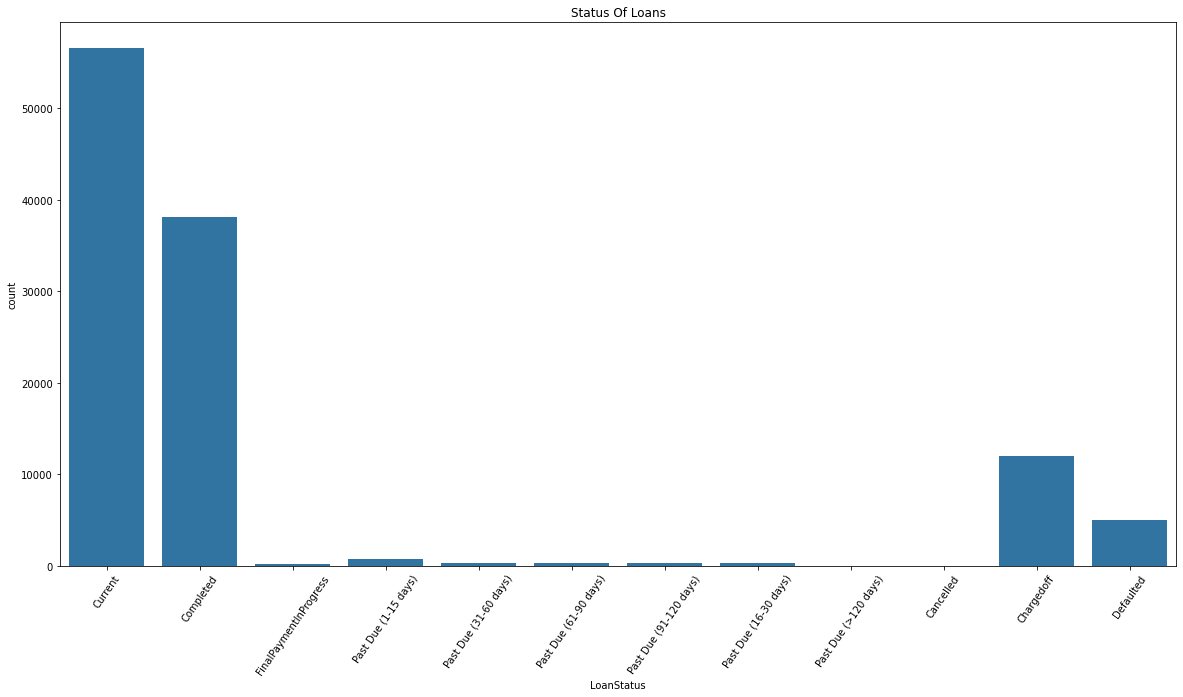

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,10])
sb.countplot(data = loan_data, x = 'LoanStatus',color=base_color)
plt.xticks(rotation=55)
plt.title('Status Of Loans');

## Distribution of Employment Status
From the records the majority of loans are current above 5000 records, followed by completed loans slightly below 4000 records. Changedoff were above 1000 records. with the least being cancelled with 5 records.

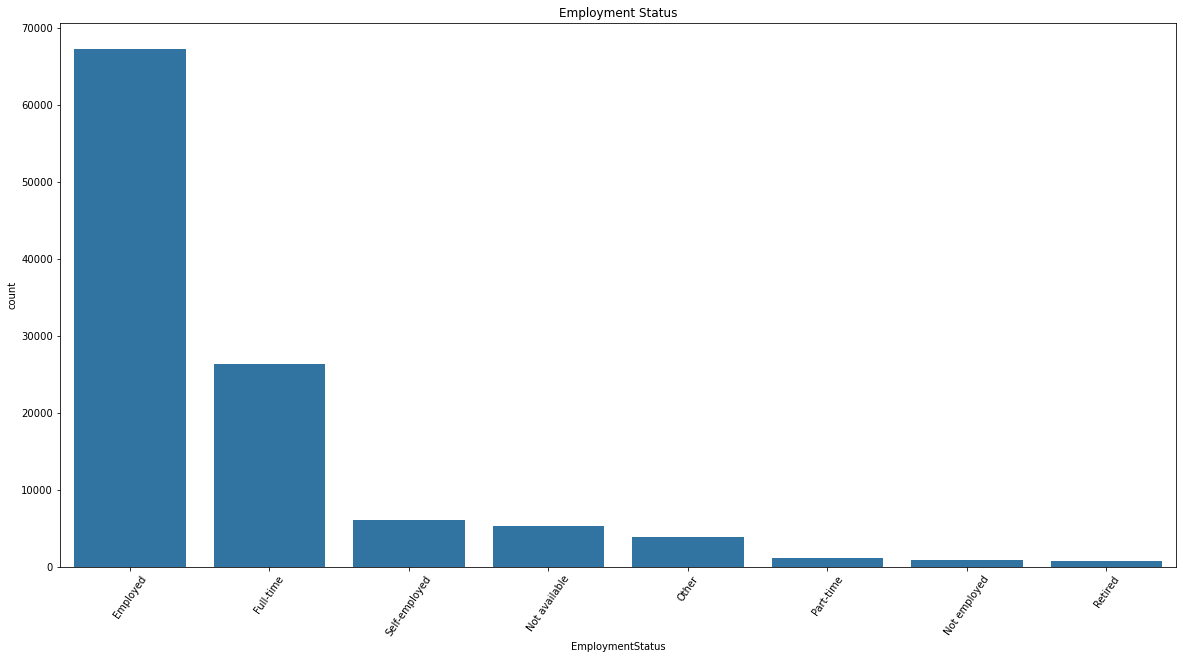

In [6]:
# Let's look 
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,10])
sb.countplot(data = loan_data, x = 'EmploymentStatus',color=base_color)
plt.xticks(rotation=55)
plt.title('Employment Status');

## Distribution Of Borrower Rate

The distribution is multimodal.A small number of loans were offered from 0 to 4% and starts by having an increase from 5%, with the first spike at 14% and 15%. Another comes at 19% with the highest at 32%. From 35% there were little rates found.


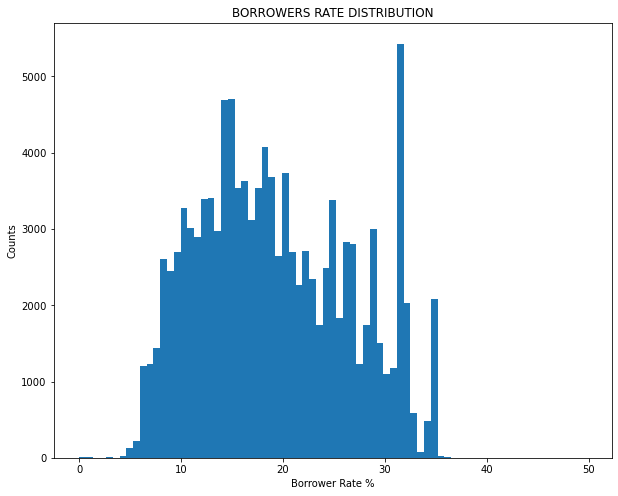

In [7]:
# plotting the Borrowers' RATE distribution 
plt.figure(figsize = [10,8])
plt.hist(data =  loan_data, x = 'BorrowerRate', bins = 75)
plt.xlabel('Borrower Rate %')
plt.ylabel('Counts')
plt.title('BORROWERS RATE DISTRIBUTION')
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0', '10' ,'20', 30, 40, 50]);

## Distribution of Borrower Rate Over The Completed,Chargedoff and Defaulted Loans
The first histogram shows the Distribution of the the borrower's interest rate which were Completed(38074). It shows that most most of the completed loans were those below the 20% rate though we had some spikes after the 20% rate those are the exceptions and can be looked into further. The rate with the most completed status is 15%.

The second shows a distribution of the Borrowers's rate which were chargedoff. The distribution here too is multimodel and with a total of 11992 loans chargedoff most with have the highest number at the 31% and 32% rates.

The Defaulted distribution with total number of 5018 loans has the highest number of defaulted loans at 29%.

In [8]:
Completed = loan_data.query('LoanStatus == "Completed"')
Chargedoff = loan_data.query('LoanStatus == "Chargedoff"')
Defaulted = loan_data.query('LoanStatus == "Defaulted"')

len(Completed),len(Chargedoff),len(Defaulted)

(38074, 11992, 5018)

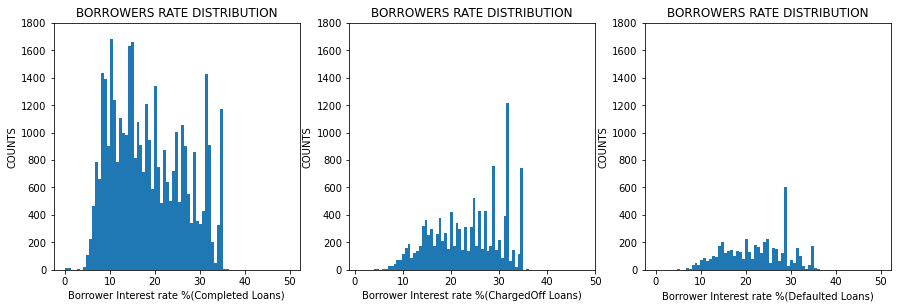

In [9]:
# the Borrowers' INTEREST RATE distribution for Completed, ChargedOff and Defaulted 
plt.figure(figsize= [15,10])
plt.subplot(2, 3, 1)
plt.hist(data = Completed, x = 'BorrowerRate', bins = 75)
plt.xlabel('Borrower Interest rate %(Completed Loans)')
plt.ylabel('COUNTS')
plt.title('BORROWERS RATE DISTRIBUTION')
plt.ylim(0,1800)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0', '10' ,'20', 30, 40, 50])


plt.subplot(2, 3, 2)
plt.hist(data = Chargedoff, x = 'BorrowerRate', bins = 75)
plt.xlabel('Borrower Interest rate %(ChargedOff Loans)')
plt.ylabel('COUNTS')
plt.title('BORROWERS RATE DISTRIBUTION')
plt.ylim(0, 1800)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0', '10' ,'20', 30, 40, 50])

plt.subplot(2, 3 ,3)
plt.hist(data = Defaulted, x = 'BorrowerRate', bins = 75)
plt.ylabel('COUNTS')
plt.xlabel('Borrower Interest rate %(Defaulted Loans)')
plt.ylim(0, 1800)
plt.title('BORROWERS RATE DISTRIBUTION')
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0', '10' ,'20', 30, 40, 50]);

## The Relationship Between Employment Status and Borrower's Rate
In medians for most of the Employemtent status were between 10% to 20% with most of the distribution around that area. The one that stood out the most was the Not employed distribution of which had the large number of rates aound the 30%.


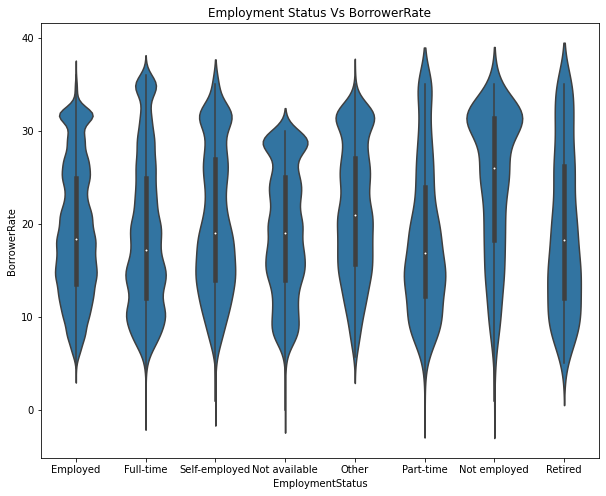

In [10]:
plt.figure(figsize = [10,8])
sb.violinplot(data=loan_data, x='EmploymentStatus', y='BorrowerRate', color=base_color)
plt.yticks([0.0,0.1,0.2,0.3,0.4],[0,10,20,30,40])
plt.title('Employment Status Vs BorrowerRate');

## Income Range vs Employment Status vs IsBorrowerHomeOwner'

Looking at how the Income Range,Employments status we could see that those who earned more money and homeowners were granted more loans not considering their type of employment.

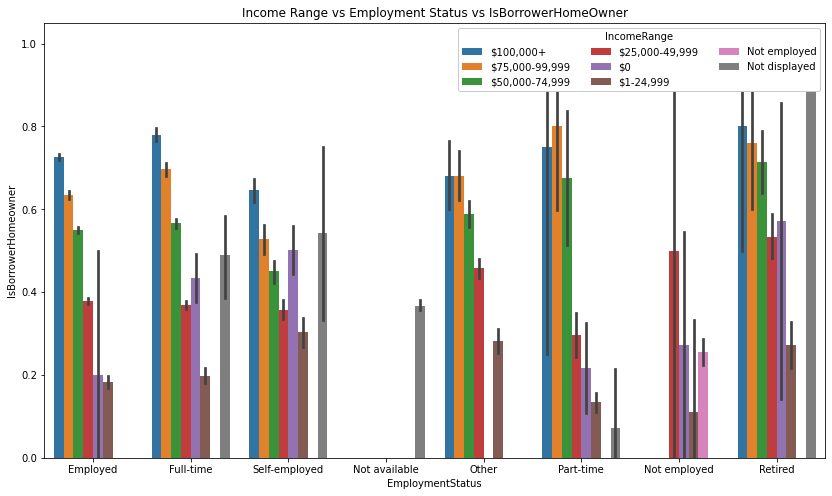

In [11]:
plt.figure(figsize=[14, 8])
ax = sb.barplot(data = loan_data, x = 'EmploymentStatus', y = 'IsBorrowerHomeowner', hue = 'IncomeRange')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'IncomeRange')
ax.set_title('Income Range vs Employment Status vs IsBorrowerHomeOwner');

This next graph is clearer and focuses more on the employed

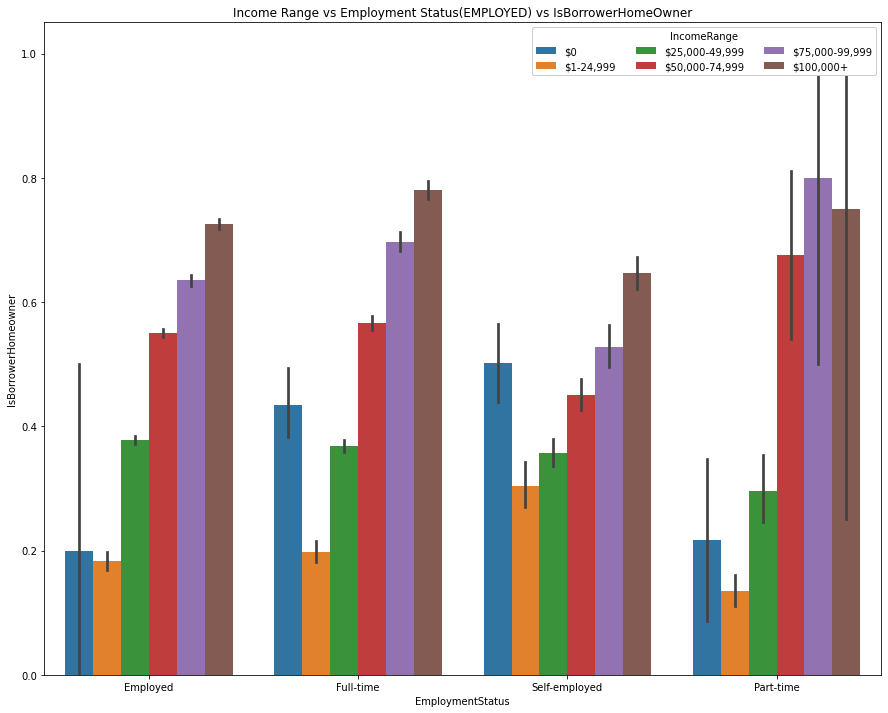

In [12]:
loan_data_earning = loan_data.query('IncomeRange == ["$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"] and EmploymentStatus == ["Employed","Full-time","Self-employed","Part-time"]')

IncomeRange = ["$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
EmploymentStatus = ['Employed','Full-time','Self-employed','Part-time']
#IncomeRange
cat_ordered = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = IncomeRange)
loan_data_earning['IncomeRange'] = loan_data_earning['IncomeRange'].astype(cat_ordered)

#employmentstatus
cat_ordered1 = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = EmploymentStatus)
loan_data_earning['EmploymentStatus'] = loan_data_earning['EmploymentStatus'].astype(cat_ordered1)
#
plt.figure(figsize = [15,12])
ax = sb.barplot(data = loan_data_earning ,x = 'EmploymentStatus', y = 'IsBorrowerHomeowner', hue = 'IncomeRange')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'IncomeRange')
ax.set_title('Income Range vs Employment Status(EMPLOYED) vs IsBorrowerHomeOwner');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

